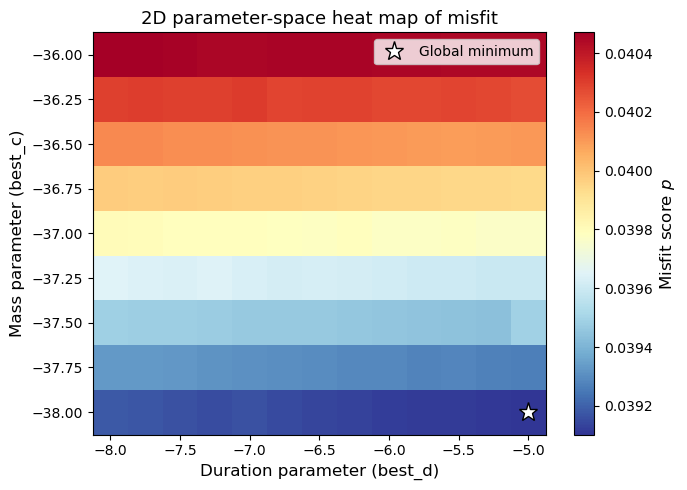

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 读入汇总 CSV
df = pd.read_csv("p_summary3.csv")

# ===== 在这里选择你想做成二维图的两个参数 =====
# 比如下例：x = best_d（持续时间），y = best_c（碳总量），颜色 = best_p（误差）
x_col = "folder_param1"
y_col = "folder_param2"
z_col = "best_p"

# 2. 把散点数据整理成规则网格：行 = y, 列 = x，值 = z
#    如果同一个 (x,y) 有多行，就取最小的 p（你也可以改成 'mean' 等）
pivot = df.pivot_table(index=y_col,
                       columns=x_col,
                       values=z_col,
                       aggfunc="min")

# 网格坐标
x_vals = pivot.columns.to_numpy()      # 唯一 x
y_vals = pivot.index.to_numpy()       # 唯一 y
X, Y = np.meshgrid(x_vals, y_vals)    # 生成网格
Z = pivot.to_numpy()                  # 对应的 z 值

# 3. 画二维参数空间热图
fig, ax = plt.subplots(figsize=(7, 5))

# 用 pcolormesh 画伪彩色图（和示例图类似）
pcm = ax.pcolormesh(X, Y, Z,
                    shading="auto",
                    cmap = 'RdYlBu_r')   # 避免维度不匹配的告警

# 颜色条
cbar = fig.colorbar(pcm, ax=ax)
cbar.set_label("Misfit score $p$", fontsize=12)

# 坐标轴标签（按你的物理量改）
ax.set_xlabel("Duration parameter (best_d)", fontsize=12)
ax.set_ylabel("Mass parameter (best_c)", fontsize=12)

# 4. 额外：标出全局最小 p 的位置（白色星号）
idx_min = df[z_col].idxmin()
x_min = df.loc[idx_min, x_col]
y_min = df.loc[idx_min, y_col]
ax.plot(x_min, y_min,
        marker="*",
        markersize=14,
        markeredgecolor="k",
        markerfacecolor="w",
        linestyle="none",
        label="Global minimum")

ax.legend(loc="best", frameon=True)
ax.set_title("2D parameter-space heat map of misfit", fontsize=13)

plt.tight_layout()
plt.show()


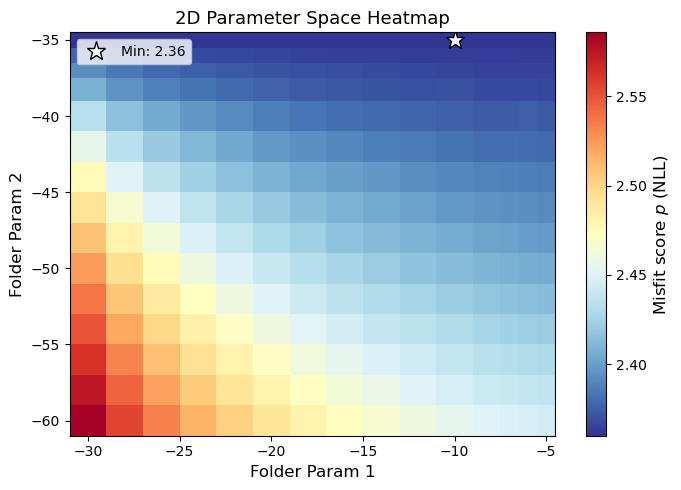

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 读入汇总 CSV
df = pd.read_csv("k=5/summary_weighted_p_draw.csv")

# 提取参数
pattern = r'(-?[\d\.]+)_(-?[\d\.]+)'
parsed_params = df['folder'].astype(str).str.extract(pattern)

# 将提取出来的字符串转换为浮点数
df['parsed_p1'] = pd.to_numeric(parsed_params[0], errors='coerce')
df['parsed_p2'] = pd.to_numeric(parsed_params[1], errors='coerce')

# 检查是否有解析失败的行
if df[['parsed_p1', 'parsed_p2']].isna().any().any():
    print("警告：部分 folder 格式无法解析，已标记为 NaN")

# %% 过滤掉 NaN 数据，创建绘图专用 DataFrame
valid_mask = df['parsed_p1'].notna() & df['parsed_p2'].notna() & df['Best_P'].notna()
plot_data = df[valid_mask].copy()

# 定义列名变量（字符串）
x_col_name = 'parsed_p1'
y_col_name = 'parsed_p2'
z_col_name = 'Best_P'

# 2. 【修正点】直接在 plot_data 上调用 pivot_table，传入列名字符串
pivot = plot_data.pivot_table(index=y_col_name,
                              columns=x_col_name,
                              values=z_col_name,
                              aggfunc="min")

# 网格坐标
x_vals = pivot.columns.to_numpy()       # 唯一 x
y_vals = pivot.index.to_numpy()         # 唯一 y
X, Y = np.meshgrid(x_vals, y_vals)      # 生成网格
Z = pivot.to_numpy()                    # 对应的 z 值

# 3. 画二维参数空间热图
fig, ax = plt.subplots(figsize=(7, 5))

# 用 pcolormesh 画伪彩色图
pcm = ax.pcolormesh(X, Y, Z,
                    shading="auto",
                    cmap='RdYlBu_r')

# 颜色条
cbar = fig.colorbar(pcm, ax=ax)
cbar.set_label("Misfit score $p$ (NLL)", fontsize=12)

# 坐标轴标签
ax.set_xlabel("Folder Param 1", fontsize=12)
ax.set_ylabel("Folder Param 2", fontsize=12)

# 4. 【修正点】标出全局最小 p 的位置
# 获取最小值所在的行
min_row = plot_data.loc[plot_data[z_col_name].idxmin()]
x_min = min_row[x_col_name]
y_min = min_row[y_col_name]

ax.plot(x_min, y_min,
        marker="*",
        markersize=14,
        markeredgecolor="k",
        markerfacecolor="w",
        linestyle="none",
        label=f"Min: {min_row[z_col_name]:.2f}")

ax.legend(loc="best", frameon=True)
ax.set_title("2D Parameter Space Heatmap", fontsize=13)

plt.tight_layout()
plt.show()

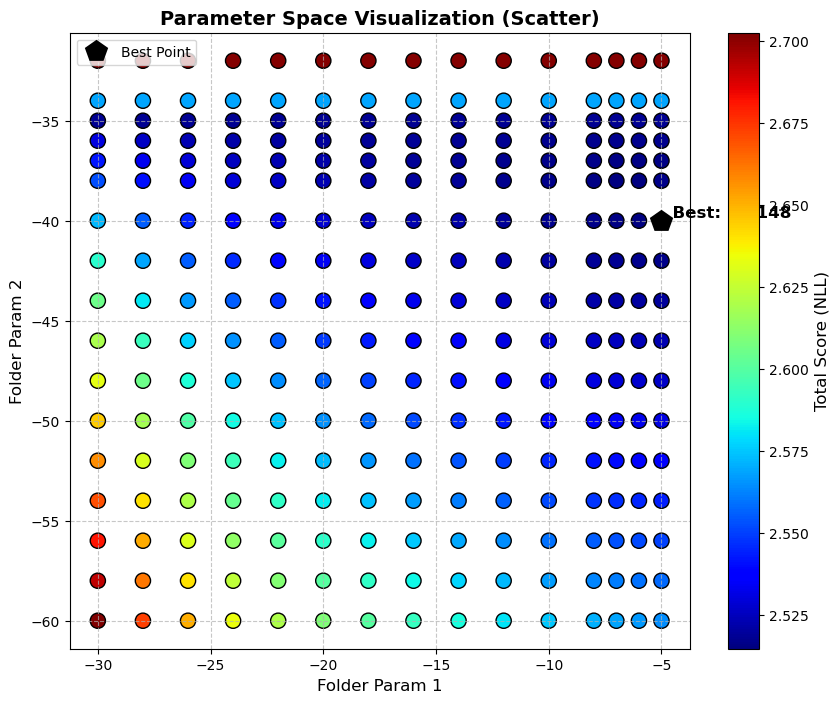

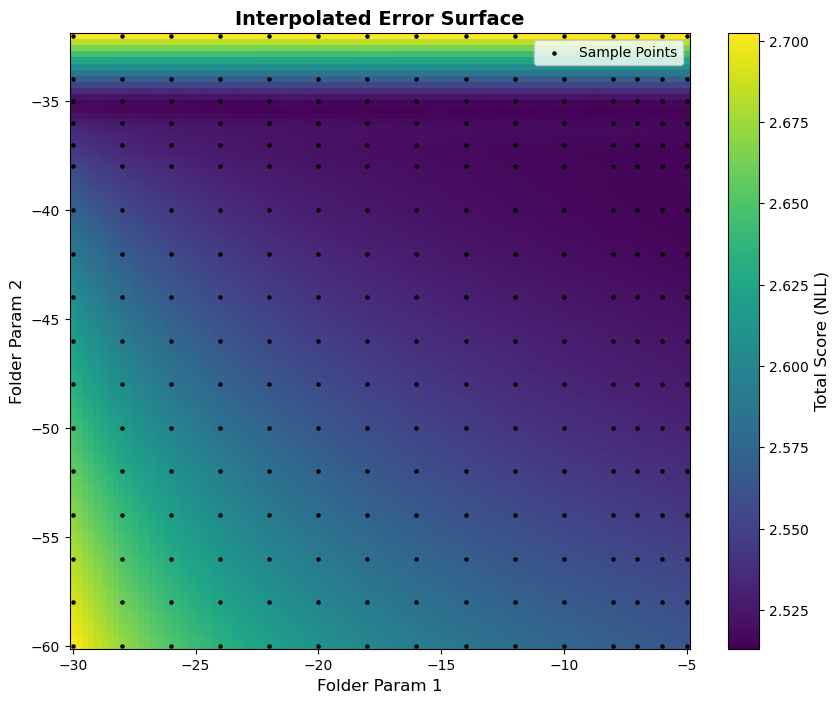